# Source

Simulation
- [towardsai](https://pub.towardsai.net/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8)
- [towardsdatascience](https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a)
- [pbpython](https://pbpython.com/monte-carlo.html)
- [sonofacorner](https://www.sonofacorner.com/an-introduction-to-monte-carlo/)
- [datasciencedojo](https://medium.com/@juee_thete/understanding-monte-carlo-simulation-and-its-implementation-with-python-3ecacb958cd4)
- [datasciencedojo](https://datasciencedojo.com/blog/monte-carlo-simulation-python/)
- [pythonprogramming](https://pythonprogramming.net/monte-carlo-simulator-python/)
- [altcoinoracle](https://altcoinoracle.com/a-monte-carlo-simulation-in-python/)
- [datacamp](https://www.datacamp.com/courses/monte-carlo-simulations-in-python)


Visuals
- [interactive-plot-libraries](https://mode.com/blog/python-interactive-plot-libraries/)

>No copyright infringement is intended.

# Imports

In [1]:
%load_ext blackcellmagic

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from pprint import pprint
import pandas as pd

In [3]:
from ipywidgets import interact, IntSlider, fixed
sns.set_style('darkgrid')

# Monte-Carlo Simulation

At its simplest level, a Monte Carlo analysis (or simulation) involves running many scenarios with different random inputs and summarizing the distribution of the results.

Monte Carlo simulations is relatively easy to explain to the end user of the prediction. The person receiving this estimate may not have a deep mathematical background but can intuitively understand what this simulation is doing and how to assess the likelihood of the range of potential results.

## Coin Flip

The probability of head for a fair coin is 1/2. 

    However, is there any way we can prove it experimentally?

In [2]:
def coin_flip():
    """_summary_

    Returns:
        _type_: _description_
    """
    return random.randint(0, 1)

In [3]:
def monte_carlo(n:int, debug:bool=False):
    """_summary_

    Args:
        n (int): _description_
        debug (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """
    coin: list[float] = []
    results: int = 0
    
    for i in range(n):
        flip_result: int = coin_flip()
        
        if debug:
            print(flip_result)
        
        results += flip_result
        prob_value: float = results / (i+1)
        coin.append(prob_value)

    plt.plot(coin, linewidth=1, color='r')
    plt.axhline(y=.5, color='g', linestyle='--')
    plt.xlabel('Iterations')
    plt.ylabel("Probability")
    plt.ylim(0,1)
    plt.title(f"Simulation for {n} rounds")
    sns.despine()
    plt.show()
    
    if debug:
        print(coin)
        print(results)
        print(n)
    
    return f'Final probability: {results/n:.2%}'


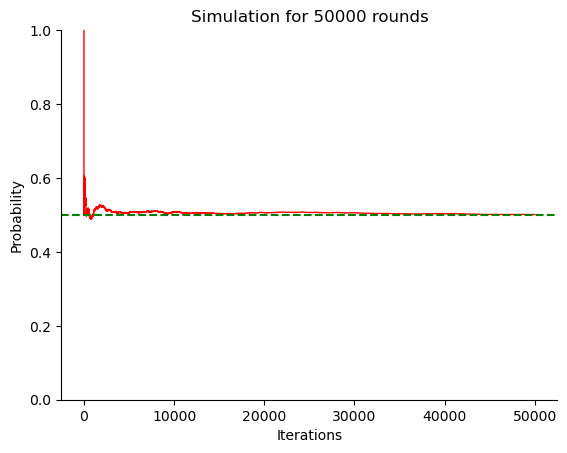

'Final probability: 50.08%'

In [4]:
monte_carlo(50_000, False)

In [5]:
# %matplotlib widget
# monte_carlo(4)

In [7]:
interact(monte_carlo, n= IntSlider(min=1, max=15_000, step=99, value=10_000, continuous_update=False), debug=fixed(False));

interactive(children=(IntSlider(value=10000, continuous_update=False, description='n', max=15000, min=1, step=…

None

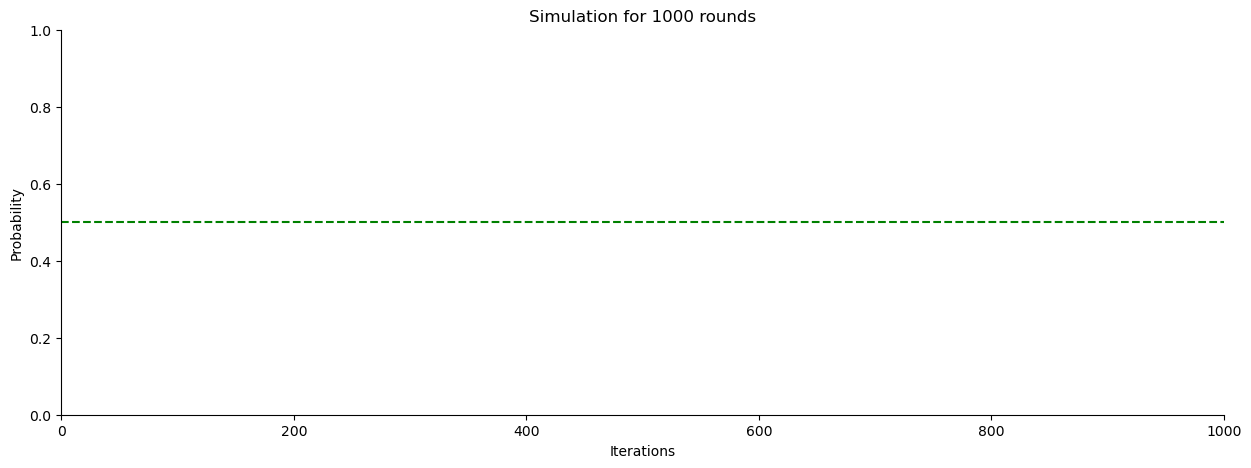

In [42]:
# %matplotlib ipympl

n = 1_000
fig, ax = plt.subplots(figsize=(15, 5))
# plt.rcParams["animation.html"] = "jshtml"

coin: list[float] = []
results: int = 0

for i in range(n):
    flip_result: int = coin_flip()

    results += flip_result
    prob_value: float = results / (i + 1)
    coin.append(prob_value)


def animate(i):
    ax.clear()
    plt.plot(coin[:i])
    plt.axhline(y=0.5, color="g", linestyle="--")
    plt.xlabel("Iterations")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.xlim(0, n)
    plt.title(f"Simulation for {n} rounds")
    sns.despine()


ani = FuncAnimation(fig, animate, range(1, n, 10), interval=200, blit=False, repeat_delay=500, init_func=None)

# plt.close()
# display(display(HTML(ani.to_jshtml())))


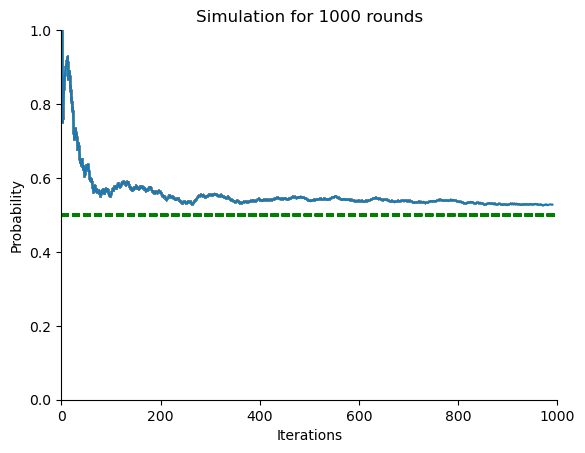

In [43]:
display(HTML(ani.to_html5_video()))

In [39]:
# type(ani.to_jshtml())

Verdict:

- for larger run, probability really is around 50%.

##  Monty Hall Problem

Suppose you are on a game show, and you have the choice of picking one of three doors: Behind one door is a car; behind the other doors, goats. You pick a door, let’s say door 1, and the host, who knows what’s behind the doors, opens another door, say door 3, which has a goat. The host then asks you: do you want to stick with your choice or choose another door?

    Is it to your advantage to switch your choice of door?

In [30]:
def monte_carlo(n:int) -> tuple[list[float], list[float], float, float]:
    """_summary_

    Args:
        n (int): _description_

    Returns:
        tuple[list[float], list[float], float, float]: _description_
    """
    # possible wins
    doors = ["car", "goat", "goat"]
    
    # store probabilities
    switch_win_prob: list = []
    stick_win_prob: list = []
    
    # init win counts
    switch_win_count: int = 0
    stick_win_count: int = 0

    for i in range(n):
        import random
        
        # randomized wins
        random.shuffle(doors)
        k = random.randrange(0, len(doors) - 1)
        
        # win decision
        if doors[k] != "car":
            switch_win_count += 1
        else:
            stick_win_count +=1
        
        # calculate probability
        _switch_win_prob: float = switch_win_count / (i + 1)
        _stick_win_prob: float = stick_win_count / (i + 1)
        
        # store probabilities
        switch_win_prob.append(_switch_win_prob)
        stick_win_prob.append(_stick_win_prob)

    return switch_win_prob, stick_win_prob, switch_win_prob[-1], stick_win_prob[-1]

Always switching win probability 65.91%
Always sticking win probability 34.09%


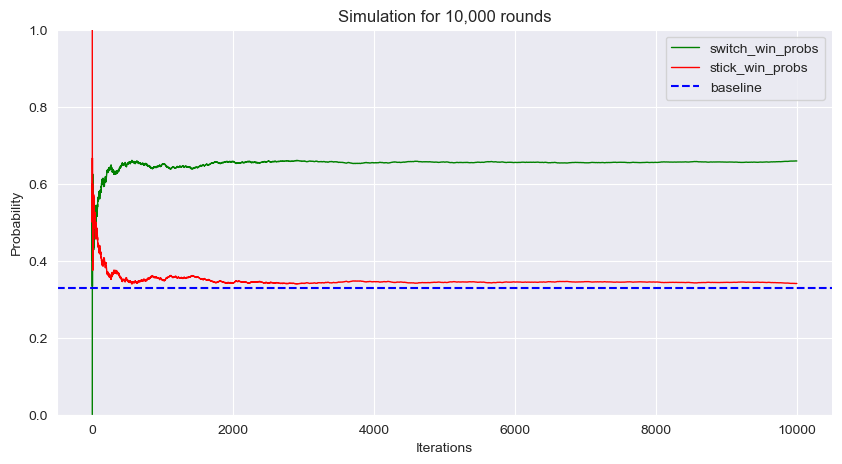

In [76]:
# simulation
n: int = 10_000
switch_win_probs, stick_win_probs, switch, stick = monte_carlo(n=n)

print(f"Always switching win probability {switch:.2%}")
print(f"Always sticking win probability {stick:.2%}")

# plot
fig, ax = plt.subplots(figsize=(10, 5))

## lines
plt.plot(switch_win_probs, linewidth=1, color="g", label="switch_win_probs")
plt.plot(stick_win_probs, linewidth=1, color="r", label="stick_win_probs")
plt.axhline(y=round(1 / 3, 2), color="b", linestyle="--", label="baseline")

## formatting
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.title(f"Simulation for {n:,d} rounds")
sns.despine()
plt.show()

Verdict:

- always switch

## Sales commissions

Sales commissions can be a large selling expense and it is important to plan appropriately for this expense. How much money we should budget for sales commissions for the next year. 

    Simulation to predict the range of potential values for a sales compensation budget.

In [18]:
avg: float = 1
std_dev: float = .1
num_reps: int = 500
num_simulations: int = 10_000

In [106]:
pct_to_target: np.ndarray = np.random.normal(avg, std_dev, num_reps).round(2)

In [104]:
sales_target_values: list[int] = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob: list[float] = [0.3, 0.3, 0.2, 0.1, 0.05, 0.05]
sales_target: list[int] = np.random.choice(
    sales_target_values, num_reps, p=sales_target_prob
)

In [103]:
df: pd.DataFrame = pd.DataFrame(
    index=range(num_reps),
    data={"Pct_To_Target": pct_to_target, "Sales_Target": sales_target},
)

df["Sales"] = df["Pct_To_Target"] * df["Sales_Target"]

In [22]:
df

Pct_To_Target  Sales_Target     Sales
0             0.86         75000   64500.0
1             0.93        300000  279000.0
2             0.95        100000   95000.0
3             1.07        400000  428000.0
4             0.97        200000  194000.0
..             ...           ...       ...
495           1.02        100000  102000.0
496           0.99         75000   74250.0
497           1.02        200000  204000.0
498           1.00        200000  200000.0
499           1.02        100000  102000.0

[500 rows x 3 columns]

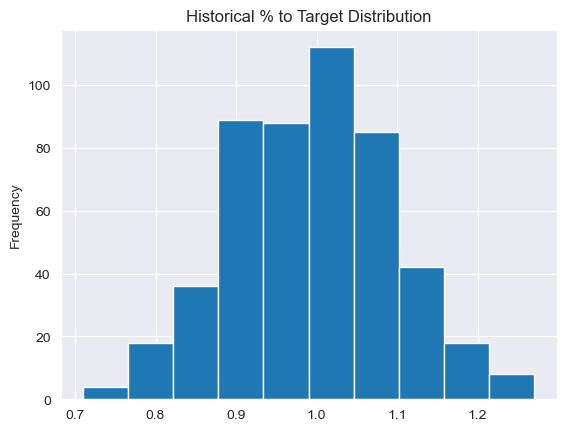

In [23]:
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution');

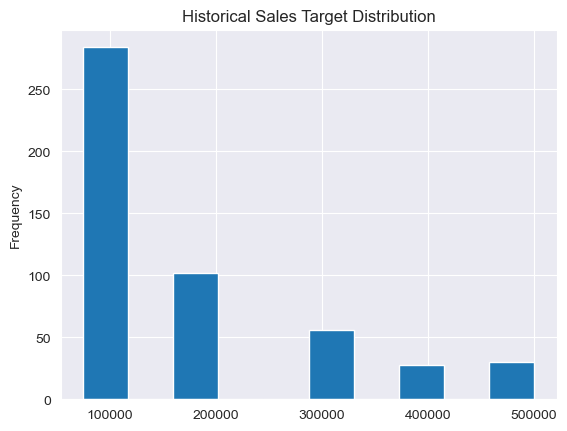

In [24]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution');

In [25]:
def calc_commission_rate(x: float | int):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [26]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [27]:
df

Pct_To_Target  Sales_Target     Sales  Commission_Rate  Commission_Amount
0             0.86         75000   64500.0             0.02             1290.0
1             0.93        300000  279000.0             0.03             8370.0
2             0.95        100000   95000.0             0.03             2850.0
3             1.07        400000  428000.0             0.04            17120.0
4             0.97        200000  194000.0             0.03             5820.0
..             ...           ...       ...              ...                ...
495           1.02        100000  102000.0             0.04             4080.0
496           0.99         75000   74250.0             0.03             2227.5
497           1.02        200000  204000.0             0.04             8160.0
498           1.00        200000  200000.0             0.04             8000.0
499           1.02        100000  102000.0             0.04             4080.0

[500 rows x 5 columns]

In [108]:
# Define a list to keep all the results from each simulation
all_stats: list[float, float, float] = []

# Loop through simulations
for i in range(num_simulations):
    # Choose random inputs for the sales targets and percent to target
    sales_target: np.ndarray = np.random.choice(
        sales_target_values, num_reps, p=sales_target_prob
    )
    pct_to_target: np.ndarray = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df: pd.DataFrame = pd.DataFrame(
        index=range(num_reps),
        data={"Pct_To_Target": pct_to_target, "Sales_Target": sales_target},
    )

    # Back into the sales number using the percent to target rate
    df["Sales"] = df["Pct_To_Target"] * df["Sales_Target"]

    # Determine the commissions rate and calculate it
    df["Commission_Rate"] = df["Pct_To_Target"].apply(calc_commission_rate)
    df["Commission_Amount"] = df["Commission_Rate"] * df["Sales"]

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append(
        [
            df["Sales"].sum().round(0),
            df["Commission_Amount"].sum().round(0),
            df["Sales_Target"].sum().round(0),
        ]
    )

In [40]:
results_df: pd.DataFrame = pd.DataFrame.from_records(
    all_stats, columns=["Sales", "Commission_Amount", "Sales_Target"]
)

In [102]:
results_df.describe().transpose().style.format('{:,}').format('{:.1f}')

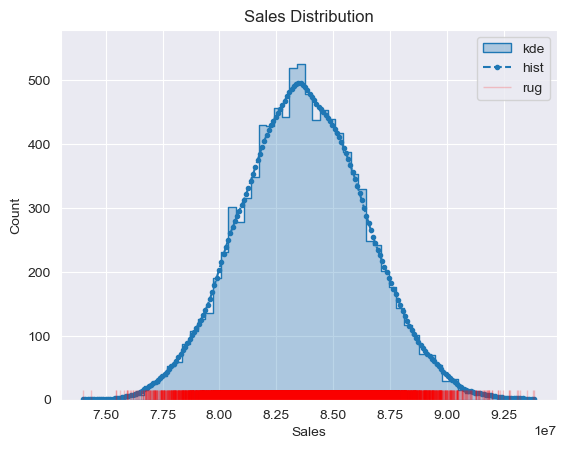

In [111]:
sns.histplot(results_df["Sales"], 
             kde=True, 
             alpha=.3, 
             line_kws=dict(lw= 1.5, marker='.', linestyle='dashed'),
             element="step")
sns.rugplot(results_df["Sales"], color='r', alpha=.2)
plt.title(label="Sales Distribution")
plt.legend(["kde", "hist", "rug"])
plt.show()

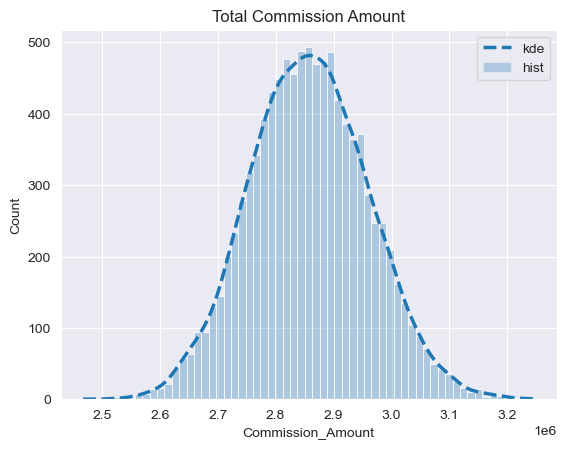

In [97]:
sns.histplot(results_df["Commission_Amount"], 
             kde=True, 
             alpha=.3, 
             line_kws=dict(lw= 2.5, marker=None, linestyle='dashed'),
             element="bars")
plt.title(label="Total Commission Amount")
plt.legend(["kde", "hist"])
plt.show()

Verdict:

We can see that the average commissions expense is \$2.85M and the standard deviation is \$103K. We can also see that the commissions payment can be as low as \$2.5M or as high as \$3.2M.

Based on these results, how comfortable are you that the expense for commissions will be less than \$3M? Or, if someone says, "Let’s only budget \$2.7M" would you feel comfortable that your expenses would be below that amount? Probably not.

Therein lies one of the benefits of the Monte Carlo simulation. You develop a better understanding of the distribution of likely outcomes and can use that knowledge plus your business acumen to make an informed estimate.

The other value of this model is that you can model many different assumptions and see what happens. Here are some simple changes you can make to see how the results change:

- Increase top commission rate to 5%
- Decrease the number of sales people
- Change the expected standard deviation to a higher amount
- Modify the distribution of targets
  
and do some `scenario analysis`.

#### scenario analysis

In [8]:
def montecarlo_sales(
    scenario_name: str,
    avg: float,
    std_dev: float,
    num_reps: int,
    num_simulations: int,
    sales_target_values: list[int],
    sales_target_prob: list[float],
    commissions_target: list[float],
    commissions: list[float],
):
    # Define a list to keep all the results from each simulation
    all_stats: list[float, float, float] = []

    def _calc_commission_rate(x: float | int):
        if x <= commissions_target[0]:
            return commissions[0]
        if x <= commissions_target[1]:
            return commissions[1]
        else:
            return commissions[2]

    # Loop through simulations
    for i in range(num_simulations):
        # Choose random inputs for the sales targets and percent to target
        sales_target: np.ndarray = np.random.choice(
            sales_target_values, num_reps, p=sales_target_prob
        )
        pct_to_target: np.ndarray = np.random.normal(avg, std_dev, num_reps).round(2)

        # Build the dataframe based on the inputs and number of reps
        df: pd.DataFrame = pd.DataFrame(
            index=range(num_reps),
            data={"Pct_To_Target": pct_to_target, "Sales_Target": sales_target},
        )

        # Back into the sales number using the percent to target rate
        df["Sales"] = df["Pct_To_Target"] * df["Sales_Target"]

        # Determine the commissions rate and calculate it
        df["Commission_Rate"] = df["Pct_To_Target"].apply(_calc_commission_rate)
        df["Commission_Amount"] = df["Commission_Rate"] * df["Sales"]

        # We want to track sales,commission amounts and sales targets over all the simulations
        all_stats.append(
            [
                df["Sales"].sum().round(0),
                df["Commission_Amount"].sum().round(0),
                df["Sales_Target"].sum().round(0),
            ]
        )

    results_df: pd.DataFrame = pd.DataFrame.from_records(
        all_stats, columns=["Sales", "Commission_Amount", "Sales_Target"]
    )

    display(results_df.describe().transpose().style.format("{:,}").format("{:.1f}"))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.histplot(
        results_df["Sales"],
        kde=True,
        alpha=0.3,
        line_kws=dict(lw=1.5, marker=".", linestyle="dashed"),
        element="step",
        ax=ax[0],
    )
    sns.rugplot(results_df["Sales"], color="r", alpha=0.2, ax=ax[0])
    ax[0].set_title(label="Sales Distribution")
    ax[0].legend(["hist", "kde", "rug"])

    sns.histplot(
        results_df["Commission_Amount"],
        kde=True,
        alpha=0.3,
        line_kws=dict(lw=2.5, marker=None, linestyle="dashed"),
        element="bars",
        ax=ax[1],
    )
    ax[1].set_title(label="Total Commission Amount")
    ax[1].legend(["kde", "hist"])
    plt.suptitle(f"{scenario_name}: Simulation for {num_simulations} rounds")
    plt.show()

In [9]:
num_simulations: int = 10_000

scenario_analysis: list[dict] = [
    {
        "scenario": "base",
        "values": dict(
            avg=1,
            std_dev=0.1,
            num_reps=500,
            num_simulations=num_simulations,
            sales_target_values=[
                75_000,
                100_000,
                200_000,
                300_000,
                400_000,
                500_000,
            ],
            sales_target_prob=[0.3, 0.3, 0.2, 0.1, 0.05, 0.05],
            commissions_target=[0.9, 0.99, 1.0],
            commissions=[0.02, 0.03, 0.04],
        ),
    },
    {
        "scenario": "pessimistic",
        "values": dict(
            avg=1,
            std_dev=0.2,
            num_reps=400,
            num_simulations=num_simulations,
            sales_target_values=[
                75_000,
                100_000,
                200_000,
                300_000,
                400_000,
                500_000,
            ],
            sales_target_prob=[0.3, 0.3, 0.2, 0.1, 0.05, 0.05],
            commissions_target=[0.8, 0.99, 1.0],
            commissions=[0.02, 0.03, 0.05],
        ),
    },
    {
        "scenario": "optimistic",
        "values": dict(
            avg=1,
            std_dev=0.05,
            num_reps=600,
            num_simulations=num_simulations,
            sales_target_values=[
                75_000,
                100_000,
                200_000,
                300_000,
                400_000,
                500_000,
            ],
            sales_target_prob=[0.3, 0.3, 0.2, 0.08, 0.055, 0.065],
            commissions_target=[0.9, 0.99, 1.0],
            commissions=[0.02, 0.03, 0.04],
        ),
    },
]

In [10]:
pprint(scenario_analysis)

[{'scenario': 'base',
  'values': {'avg': 1,
             'commissions': [0.02, 0.03, 0.04],
             'commissions_target': [0.9, 0.99, 1.0],
             'num_reps': 500,
             'num_simulations': 10000,
             'sales_target_prob': [0.3, 0.3, 0.2, 0.1, 0.05, 0.05],
             'sales_target_values': [75000,
                                     100000,
                                     200000,
                                     300000,
                                     400000,
                                     500000],
             'std_dev': 0.1}},
 {'scenario': 'pessimistic',
  'values': {'avg': 1,
             'commissions': [0.02, 0.03, 0.05],
             'commissions_target': [0.8, 0.99, 1.0],
             'num_reps': 400,
             'num_simulations': 10000,
             'sales_target_prob': [0.3, 0.3, 0.2, 0.1, 0.05, 0.05],
             'sales_target_values': [75000,
                                     100000,
                                     

Simulation report for Base scenario.


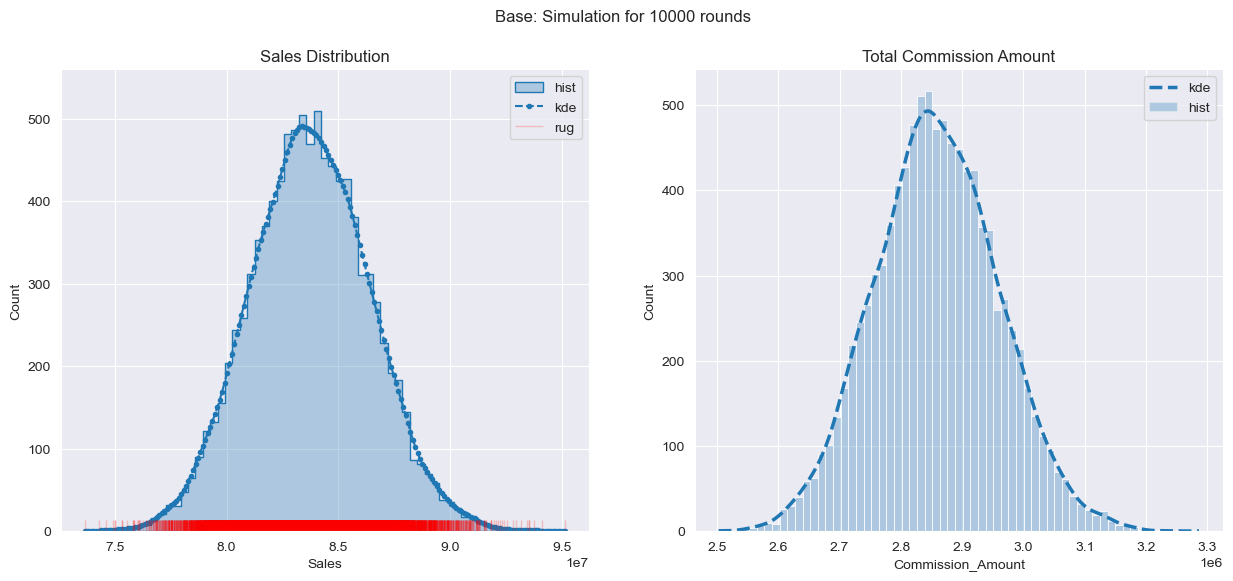

Simulation report for Pessimistic scenario.


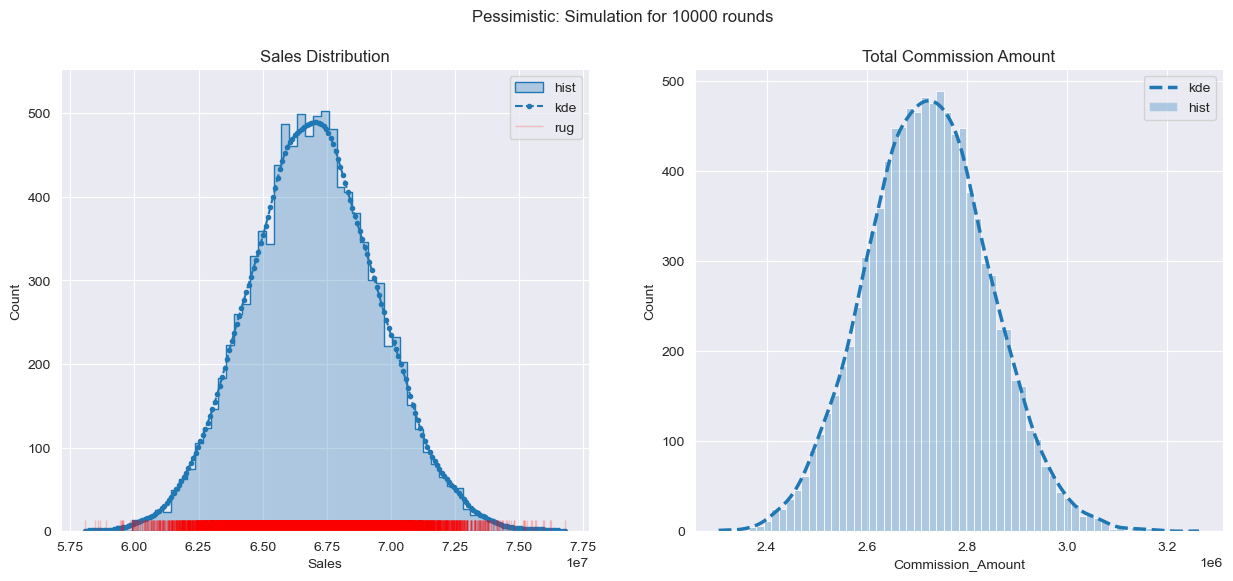

Simulation report for Optimistic scenario.


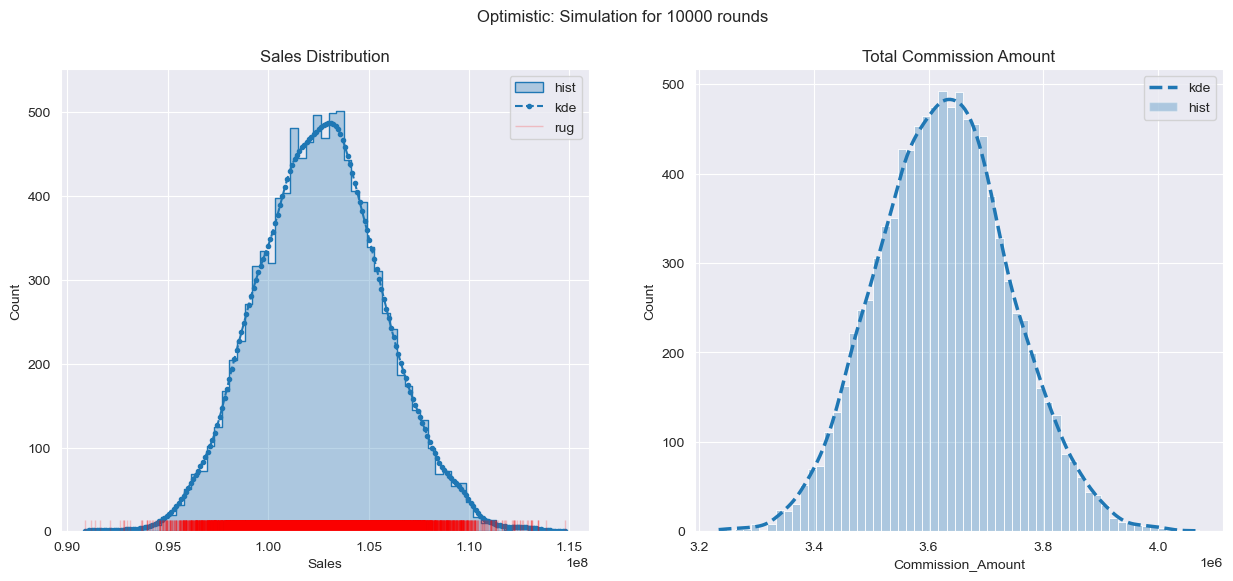

In [11]:
show_simulation_info: bool = False

for scene in scenario_analysis:
    print(f"""Simulation report for `{scene.get("scenario").title()}` scenario.""")
    montecarlo_sales(scenario_name=scene.get("scenario").title(), **scene.get("values"))
    if show_simulation_info:
        print("simulation info:")
        pprint(scene)
        print(f"{'-'*80}\n")

## Asset valuation